In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glacier
import cmocean
import importlib

In [7]:
importlib.reload(glacier)
ngridx=51
ngridz=21
D=200 # m
L=2e4 # m
dt= 2e2 # 
T= 5e2
zz=15 # dont use values on the second grid cell (unstable solution)
#C,S=glacier.glacier(ngridx,ngridz,dt,zz,T)
#Cs, Ss =glacier.glacier(ngridx,ngridz,dt,zz,T, steady = False)


In [13]:
#C,S,ck=glacier.glacier(ngridx,ngridz,dt,zz,T) # This gives an error, what is ck?
C,S=glacier.glacier(ngridx,ngridz,dt,zz,T)

In [10]:
# Diffusion only:
Cs, Ss =glacier.glacier(ngridx,ngridz,dt,zz,T, steady = False)

Text(0.45, 0.95, 'Diffusion only Methane and Salinity Concentration')

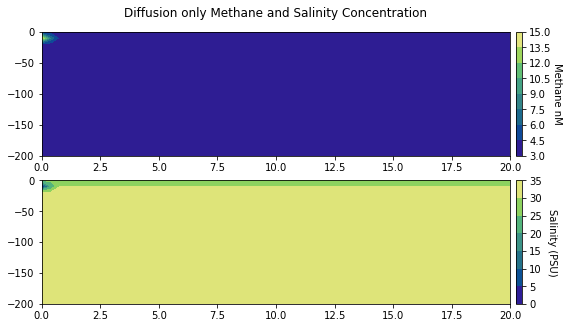

In [14]:
# Plot Diffusion only:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,C[-1,:,:].T,cmap=cmap)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,S[-1,:,:].T,cmap=cmap)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Salinity (PSU)', rotation=270)
fig.suptitle('Diffusion only Methane and Salinity Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
#plt.savefig('SteadyDiffusion.pdf')

Text(0.45, 0.95, 'Steady vs Sinks Methane Concentration')

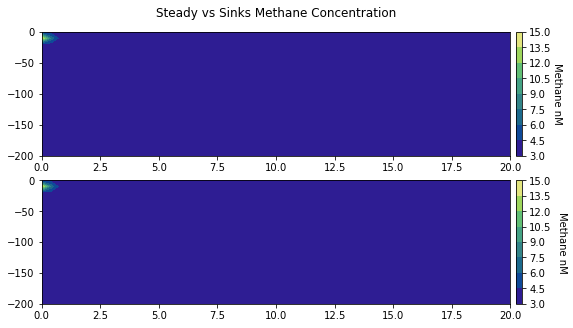

In [12]:
#Plot to compare steady state against sinks:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,C[-1,:,:].T,cmap=cmap)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,Cs[-1,:,:].T,cmap=cmap)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Methane nM', rotation=270)
fig.suptitle('Steady vs Sinks Methane Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
#plt.savefig('fig.pdf')

Text(0.45, 0.95, 'Sinks Methane and Salinity Concentration')

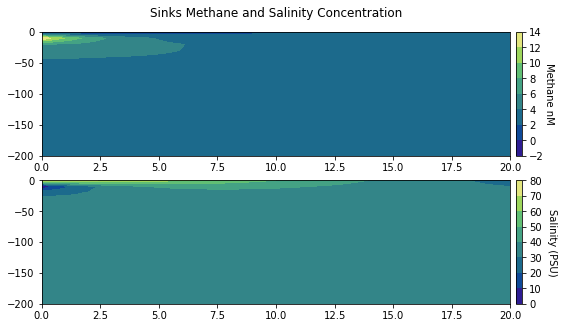

In [284]:
# Plots for Methane and salinity with Sinks:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,Cs[-1,:,:].T,cmap=cmap)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,Ss[-1,:,:].T,cmap=cmap)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Salinity (PSU)', rotation=270)
fig.suptitle('Sinks Methane and Salinity Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
#plt.savefig('SinksDiffusion.pdf')

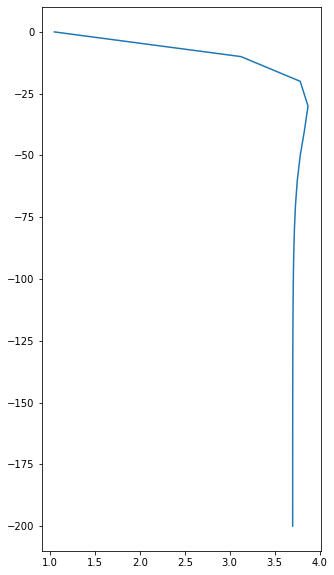

In [285]:
# Extract profiles for methane concentration with sinks, at a distance from the mouth of the glacier:
dz=D/(ngridz-1)
dx = L/(ngridx-1)
plt.figure(figsize=(5,10))
plt.plot(Cs[-1,18,:],-z)
#plt.axhline(y=-int(zz/dz)*dz)

In [288]:
zn = np.linspace(0,D,ngridz)
Sop = 33 + np.log(1e-3+zn/(D))
Sop

array([26.09224472, 30.02407035, 30.70736524, 31.10952456, 31.39554963,
       31.61769766, 31.79935499, 31.95303094, 32.08620615, 32.20371206,
       32.30885082, 32.40397953, 32.49083966, 32.57075436, 32.64475261,
       32.71365037, 32.77810567, 32.83865685, 32.89574998, 32.94975878,
       33.0009995 ])